**Author:** Demetria Murphy

# Research Questions:
* *What was the Black urban ecology of safety in post-WWII Los Angeles?* 

* *What was the impact of shifts in neighborhood socioeconomic demographics on this ecology of safety?*  

# Data Sources:
* [Green Book locations by type for SoCal, 1947](https://github.com/NYPL-publicdomain/greenbook-map/tree/master/data) (Schomburg Center for Research in Black Culture at the New York Public Library)
* [Green Book locations by type for SoCal, 1956](https://github.com/NYPL-publicdomain/greenbook-map/tree/master/data) (Schomburg Center for Research in Black Culture at the New York Public Library)
* [Los Angeles County Union Census Tract Data Series, 1940-1990](https://drive.google.com/drive/folders/1KiflC3DOQJoo_DTiZGzbr3-_QhvTh1nl?usp=sharing) from Ethington, Kooistra, and DeYoung
    * From this dataset, I am interested in the following variables and years that will help me better understand the **racial demographics** of the area in 1940 and 1960 (where yy = year):
        * **PyyB:** Population Black non-White
            * **PyyT** used to calculate percentage of Black non-white population.
        *  **PyyW:** Population White
    * Median household income data is not available until 1970 in this dataset, so I will explore  a few of the following variables to better understand the surrounding **socioeconomic context** in both 1940 and 1960 (where yy = year)::
        * **EyyH:**	Education completed high school 
        * **EyyC:**	Education completed college 
        * **OyyWC:**	Occupation White Collar
        * **OyyBC:**	Occupation Blue Collar
        * **HyyMVL:**	Median value of dwelling/housing units
        * **HyyMRN:**	Housing Median Rent of Unit
# Methodology
1. Import census tract data for race, GB1947, and GB1956.
1. Trim or bound GB1947 and GB1956 to Los Angeles locations.
1. Trim census tract data to 1940, 1950, and 1960.
1. Calculate % of race for 1940, 1950, and 1960.
1. Create multi-layered subplots for GB1947 and 1940 census.
1. Create a function and loop through all racial categories.
1. Repeat for GB1956 and 1960 census.

# Resulting Visualizations
* Green Book Location Types, 1947 x Race by Census tract
* Green Book Locations Types, 1956 x Race by Census tract (How did location types shift?)

# 1. Import census tract data for race, GB1947, and GB1956.

In [17]:
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for basemaps
import contextily as ctx

import plotly.express as px

import json

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [18]:
filename = "Data/1947-Copy1.geojson"
file = open(filename)
gb47 = gpd.read_file(file)

In [19]:
gb47.head()

,name,address,image_url,image_id,capture_uuid,dc_url,page,year,city,state,category,image_region,geocoded_address,geocoded_confidence,geometry
0,"around 20,",000 miles per year,http://images.nypl.org/index.php?id=5207629&t=q,5207629,2a4111a0-892b-0132-5d0d-58d385a7bbd0,http://digitalcollections.nypl.org/items/2a411...,12,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.10086027884900624, 'y': 0.521487419283...","000 Miles Rd, Mulberry, Tennessee 37359, Unite...",0.509286,POINT (-86.39971 35.19817)
1,St. Thomas,127 W. 10th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,WESTCHESTER,TENNESSEE,Tourist Home,"{'x': 0.12726176115802174, 'y': 0.166629736317...","127 W 10th St, Chattanooga, Tennessee 37402, U...",0.852143,POINT (-85.31081 35.04481)
2,Mrs. Ed. Andrews,69 Cotton St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,ANDALUSIA,TENNESSEE,Tourist Home,"{'x': 0.12907117008443908, 'y': 0.222690006647...","69 S Cotton St, Andalusia, Alabama 36420, Unit...",0.728333,POINT (-86.48221 31.30161)
3,Dunbar,323 N. 17th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11459589867310013, 'y': 0.266341679592...","323 N 17th St, Knoxville, Tennessee 37921, Uni...",0.852143,POINT (-83.93629 35.96380)
4,Palm Leaf,328 1/2 18th St.,http://images.nypl.org/index.php?id=5207645&t=q,5207645,2b93aef0-892b-0132-d7c7-58d385a7bbd0,http://digitalcollections.nypl.org/items/2b93a...,28,1947,BIRMINGHAM,TENNESSEE,Tourist Home,"{'x': 0.11670687575392039, 'y': 0.289829381785...","328 18th St, Knoxville, Tennessee 37916, Unite...",0.828333,POINT (-83.93586 35.95957)


In [20]:
# read file
with open('Data/greenbook_1956.json', 'r') as myfile2:
    data2=myfile2.read()

print(data2)

{"rows": [["Mrs. Sallie Galloway Tourist Home", "420 Butler Street, Anderson, SC 29624", "Tourist Home", 1956, [34.496227, -82.642532]], ["Ess-Tee Restaurant", "112 East Church Street, Anderson, SC 29624", "Restaurant", 1956, [34.502308, -82.648781]], ["C. F. Holland Tourist Home", "1118 Richland Avenue, Aiken, SC 29801", "Tourist Home", 1956, [33.565643, -81.734093]], ["James Hotel", "238 Spring Street, Charleston, SC 29403", "Hotel", 1956, [32.786724, -79.954742]], ["Mrs. Gladsen Tourist Home", "15 Nassau Street, Charleston, SC 29403", "Tourist Home", 1956, [32.792221, -79.937187]], ["Mrs. Mayes Tourist Home", "8246 Spring Street, Charleston, SC 29403", "Tourist Home", 1956, [32.791599, -79.945015]], ["Mrs. M. B. Robinson Tourist Home", "211 Church Street, Cheraw, SC 29520", "Tourist Home", 1956, [34.694691, -79.882439]], ["Liveoak Tourist Home", "328 Second Street, Cheraw, SC 29520", "Tourist Home", 1956, [34.700874, -79.886032]], ["College Inn Restaurant", "324 Second Street, Chera

In [21]:
# parse file
gb561 = json.loads(data2)
gb561

{'rows': [['Mrs. Sallie Galloway Tourist Home',
   '420 Butler Street, Anderson, SC 29624',
   'Tourist Home',
   1956,
   [34.496227, -82.642532]],
  ['Ess-Tee Restaurant',
   '112 East Church Street, Anderson, SC 29624',
   'Restaurant',
   1956,
   [34.502308, -82.648781]],
  ['C. F. Holland Tourist Home',
   '1118 Richland Avenue, Aiken, SC 29801',
   'Tourist Home',
   1956,
   [33.565643, -81.734093]],
  ['James Hotel',
   '238 Spring Street, Charleston, SC 29403',
   'Hotel',
   1956,
   [32.786724, -79.954742]],
  ['Mrs. Gladsen Tourist Home',
   '15 Nassau Street, Charleston, SC 29403',
   'Tourist Home',
   1956,
   [32.792221, -79.937187]],
  ['Mrs. Mayes Tourist Home',
   '8246 Spring Street, Charleston, SC 29403',
   'Tourist Home',
   1956,
   [32.791599, -79.945015]],
  ['Mrs. M. B. Robinson Tourist Home',
   '211 Church Street, Cheraw, SC 29520',
   'Tourist Home',
   1956,
   [34.694691, -79.882439]],
  ['Liveoak Tourist Home',
   '328 Second Street, Cheraw, SC 29520',

In [22]:
# convert json data to dataframe (ERROR) --> start here with trying to figure out how to create a df
gb56 = pd.json_normalize(gb561,'rows')
gb56

,0,1,2,3,4
0,Mrs. Sallie Galloway Tourist Home,"420 Butler Street, Anderson, SC 29624",Tourist Home,1956,"[34.496227, -82.642532]"
1,Ess-Tee Restaurant,"112 East Church Street, Anderson, SC 29624",Restaurant,1956,"[34.502308, -82.648781]"
2,C. F. Holland Tourist Home,"1118 Richland Avenue, Aiken, SC 29801",Tourist Home,1956,"[33.565643, -81.734093]"
3,James Hotel,"238 Spring Street, Charleston, SC 29403",Hotel,1956,"[32.786724, -79.954742]"
4,Mrs. Gladsen Tourist Home,"15 Nassau Street, Charleston, SC 29403",Tourist Home,1956,"[32.792221, -79.937187]"
...,...,...,...,...,...
1500,Holiday,300 Sherbrooke Street West [now Rue Sherbrooke...,Not Specified,1956,"[45.508682, -73.571114]"
1501,Mrs. M. Jemmott,"3840 Limton Avenue [Avenue Linton], Montreal, ...",Not Specified,1956,"[45.499153, -73.631905]"
1502,Casa Villa,258 Sherbrooke Street West [now Rue Sherbrooke...,Villa,1956,"[45.50898, -73.570961]"
1503,Au Repos Rooms,1824 Dorchester [Boulevard] [now Boulevard Ren...,Rooms,1956,"[45.492237, -73.576408]"


In [23]:
gdf = gpd.read_file('Data/LA4090V101.SHP')

In [24]:
gdf.head()

,AREA,PERIMETER,CTBNA,P40T,P40WNH,P40BNH,P40ONH,P40HIS,P40TW,P40NATW,...,O90BC,R90SH85,R90SC85,R90OT85,H90TOT,H90SFU,H90OTH,INC90MED,H90MVL,geometry
0,5.110526e+08,97788.60030,900100,615,605,1,3,6,611,568,...,2728.0,2920.0,6009.0,1962.0,3839.0,3691.0,148.0,38150.0,116448.0,"POLYGON ((2010981.306 627195.895, 2010985.562 ..."
1,4.139640e+08,112335.98215,900200,1312,1287,2,11,12,1299,1220,...,380.0,846.0,556.0,201.0,566.0,487.0,79.0,34600.0,123655.0,"POLYGON ((2020599.176 646773.950, 2020593.421 ..."
2,9.627060e+08,143092.75454,901202,1063,1038,1,20,4,1042,938,...,799.0,1084.0,1628.0,748.0,1435.0,1197.0,238.0,43799.0,152655.0,"POLYGON ((1970302.753 633587.024, 1970303.702 ..."
3,2.129940e+08,60542.54667,900900,1150,1122,3,14,10,1132,1055,...,608.0,968.0,1092.0,339.0,960.0,667.0,293.0,36702.0,161744.0,"POLYGON ((1970159.706 646429.761, 1970530.071 ..."
4,5.892047e+07,38184.45935,900300,522,511,2,5,5,516,487,...,454.0,902.0,731.0,252.0,816.0,421.0,395.0,24976.0,139873.0,"POLYGON ((1987195.131 635140.066, 1987161.766 ..."


In [25]:
#rename columns
gb56.columns = ['name', 'address', 'category', 'year', 'lat_long']
gb56

,name,address,category,year,lat_long
0,Mrs. Sallie Galloway Tourist Home,"420 Butler Street, Anderson, SC 29624",Tourist Home,1956,"[34.496227, -82.642532]"
1,Ess-Tee Restaurant,"112 East Church Street, Anderson, SC 29624",Restaurant,1956,"[34.502308, -82.648781]"
2,C. F. Holland Tourist Home,"1118 Richland Avenue, Aiken, SC 29801",Tourist Home,1956,"[33.565643, -81.734093]"
3,James Hotel,"238 Spring Street, Charleston, SC 29403",Hotel,1956,"[32.786724, -79.954742]"
4,Mrs. Gladsen Tourist Home,"15 Nassau Street, Charleston, SC 29403",Tourist Home,1956,"[32.792221, -79.937187]"
...,...,...,...,...,...
1500,Holiday,300 Sherbrooke Street West [now Rue Sherbrooke...,Not Specified,1956,"[45.508682, -73.571114]"
1501,Mrs. M. Jemmott,"3840 Limton Avenue [Avenue Linton], Montreal, ...",Not Specified,1956,"[45.499153, -73.631905]"
1502,Casa Villa,258 Sherbrooke Street West [now Rue Sherbrooke...,Villa,1956,"[45.50898, -73.570961]"
1503,Au Repos Rooms,1824 Dorchester [Boulevard] [now Boulevard Ren...,Rooms,1956,"[45.492237, -73.576408]"


Let's check our data before moving onto trimming the census data.

In [26]:
gdf.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 252 columns):
 #    Column     Non-Null Count  Dtype   
---   ------     --------------  -----   
 0    AREA       1656 non-null   float64 
 1    PERIMETER  1656 non-null   float64 
 2    CTBNA      1656 non-null   int64   
 3    P40T       1656 non-null   int64   
 4    P40WNH     1656 non-null   int64   
 5    P40BNH     1656 non-null   int64   
 6    P40ONH     1656 non-null   int64   
 7    P40HIS     1656 non-null   int64   
 8    P40TW      1656 non-null   int64   
 9    P40NATW    1656 non-null   int64   
 10   P40FBW     1656 non-null   int64   
 11   P40TOTNW   1656 non-null   int64   
 12   P40B       1656 non-null   int64   
 13   P40NBNW    1656 non-null   int64   
 14   P40MEX     1656 non-null   int64   
 15   P40CSA     1656 non-null   int64   
 16   E40H       1656 non-null   int64   
 17   E40C       1656 non-null   int64   
 18   O40WC      1656 non-null   int64   
 1

/tmp/ipykernel_1809/1396010356.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  gdf.info(verbose=True, null_counts=True)


In [27]:
gb47.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 1056 non-null   object  
 1   address              1056 non-null   object  
 2   image_url            1056 non-null   object  
 3   image_id             1056 non-null   object  
 4   capture_uuid         1056 non-null   object  
 5   dc_url               1056 non-null   object  
 6   page                 1056 non-null   int64   
 7   year                 1056 non-null   int64   
 8   city                 1056 non-null   object  
 9   state                1056 non-null   object  
 10  category             1056 non-null   object  
 11  image_region         1056 non-null   object  
 12  geocoded_address     1056 non-null   object  
 13  geocoded_confidence  1056 non-null   float64 
 14  geometry             1056 non-null   geometry
dtypes: float64(1)

/tmp/ipykernel_1809/3110117373.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  gb47.info(verbose=True, null_counts=True)


In [28]:
gb56.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1505 non-null   object
 1   address   1505 non-null   object
 2   category  1505 non-null   object
 3   year      1505 non-null   int64 
 4   lat_long  1505 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.9+ KB


/tmp/ipykernel_1809/890643099.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  gb56.info(verbose=True, null_counts=True)


In [29]:
import os

gdf.AREA.head()

0    5.110526e+08
1    4.139640e+08
2    9.627060e+08
3    2.129940e+08
4    5.892047e+07
Name: AREA, dtype: float64

In [30]:
gdf.PERIMETER.head()

0     97788.60030
1    112335.98215
2    143092.75454
3     60542.54667
4     38184.45935
Name: PERIMETER, dtype: float64

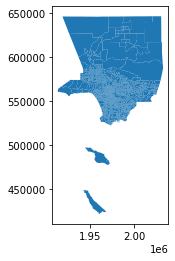

In [31]:
gdf.plot()
plt.show()

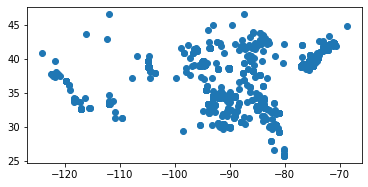

In [32]:
gb47.plot()
plt.show()

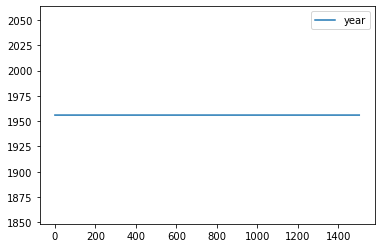

In [33]:
gb56.plot()
plt.show()

(Likely delete) Because this data is not a geodataframe, we must tell it to map the x and y coordinates.

In [34]:
#let's double check the 1947 data
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
# gb47 = gpd.GeoDataFrame(gb47, 
                      # crs='epsg:4326',
                       # geometry='geometry') #define which column is long and lat

# reproject to web mercator
# gb47_web_mercator = gb47.to_crs(epsg=3857)

# map it
# fig, ax = plt.subplots(figsize=(15,5))

# gb47_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=15,
                      color='red')

# ax.axis('off')

# ax.set_title('Greenbook Locations, 1947')

# ctx.add_basemap(ax)

IndentationError: unexpected indent (643854165.py, line 15)

Let's transfer the 1956 data to a csv file to manually separate the lat and long columns, all to create our gdf.

In [ ]:
# to manipulate csv files
# import csv
# from csv import DictWriter

# name of csv file  
# filename = "gb1956.csv"
    
# field names to use as headers
# fields = list(gb56)

# fields

In [ ]:
# write/create a new csv file ('w')=write 
# with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
   #  csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
   #  csvwriter.writerow(fields)  

In [ ]:
# Open your CSV file in append mode ('a')
# with open('gb1956.csv', 'a') as gb56file: 
      
    # create a dictionary writer
  #   dictwriter = DictWriter(gb56file, fieldnames=fields) 

    # loop through each row and add it to the csv file
  #   for index, row in gb56.iterrows():
        #Pass the dictionary as an argument to the writerow() 
      #   dictwriter.writerow(row.to_dict()) 
  
    #Close the file object 
  #   gb56file.close()

Now, let's reupload this cleaned csv file.

In [ ]:
gb56b = gpd.read_file('Data/gb1956.csv')

In [ ]:
gb56b

In [ ]:
#We don't need the oldlat and oldlong columns, so let's drop them.
columns_to_drop = ['oldlat','oldlong']
gb56b = gb56b.drop(columns_to_drop,axis=1)
gb56b.head()

In [ ]:
# convert df to gdf
# since data is in lat/lon's assign the crs to WGS84 (epsg:4326)
gb1956 = gpd.GeoDataFrame(gb56b, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gb56b.LONG, gb56b.LAT)) #define which column is long and lat

In [ ]:
gb1956

In [ ]:
# reproject to web mercator
gb56_web_mercator = gb1956.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(20, 12))

gb56_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=15,
                      color='blue')

ax.axis('off')

ax.set_title('Greenbook Locations, 1956')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
# save as html file
gb1956.save('gb56.html')

#yay! our data is working well.

Let's do some initial descriptive stats for our data.

In [ ]:
gb1956.info()

In [ ]:
gb47.info()

In [ ]:
gb47['city'].value_counts()

In [ ]:
gb1956['city'].value_counts()

In [ ]:
#save as new variable
city_count47 = gb47['city'].value_counts()

city_count47.head(10).plot.bar(x = 'city', y = 'count', title = 'Top 10 Cities in the Green Book, 1947')

In [ ]:
#save as new variable
city_count56 = gb1956['city'].value_counts()

city_count56.head(10).plot.bar(x = 'city', y = 'count', title = 'Top 10 Cities in the Green Book, 1956')

# 2. Trim or bound GB1947 and GB1956 to Los Angeles locations.

In [ ]:
#create new variable
la47 = gb47.query("city == 'LOS ANGELES'")

#add dataframe
la47 = la47.reset_index()
la47

In [ ]:
#create new variable
la56 = gb1956.query("city == ' Los Angeles'")

#add dataframe
la56 = la56.reset_index()
la56

In [ ]:
la47.info()

In [ ]:
la56.info()

Wow! Greenbook locations reduced from 101 locations in 1947 to 24 locations in 1956.

In [ ]:
category_countla47 = la47['category'].value_counts()
category_countla47.plot.bar(x = 'category', y = 'count', title = 'Green Book Location Types in Los Angeles, 1947')

In [ ]:
# add labels by providing a dict
fig = px.bar(
        la47,
        x='category',
        title='Green Book Location Types in Los Angeles, 1947',
        labels={
            'category':'Location Type',
            'count':'Number of Locations'
        } # change labels based on dictionary
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [ ]:
fig.write_html("GBLA_1947_plotly.html")

In [ ]:
category_countla56 = la56['category'].value_counts()
category_countla56.plot.bar(x = 'category', y = 'count', title = 'Green Book Location Types in Los Angeles, 1956')

In [ ]:
# add labels by providing a dict
fig = px.bar(
        la56,
        x='category',
        title='Green Book Location Types in Los Angeles, 1956',
        labels={
            'category':'Location Type',
            'count':'Number of Locations'
        } # change labels based on dictionary
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [ ]:
fig.write_html("GBLA_1947_plotly.html")

In [ ]:
la47.query("name == 'Waffle Shop'")

In [ ]:
la47 = la47.drop(labels=33,axis=0)
la47.query("name == 'Waffle Shop'")

In [ ]:
la47.query("name == 'Billy Bergs'")

In [ ]:
la47 = la47.drop(labels=76,axis=0)
la47.query("name == 'Billy Bergs'")

In [ ]:
la47.query("address == '3903 S. Central Avenue'")

In [ ]:
la47 = la47.drop(labels=81,axis=0)
la47.query("address == '3903 S. Central Avenue'")

In [ ]:
la47.query("address == '4500 S. Avalon Avenue'")

In [ ]:
la47 = la47.drop(labels=84,axis=0)
la47.query("address == '4500 S. Avalon Avenue'")

In [ ]:
# reproject to web mercator
la47_web_mercator = la47.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(20, 20))

la47_web_mercator.plot(ax=ax, 
                      marker='o',
                      markersize=50,
                      color='red')

#no axis
ax.axis('off')

#Add a Title
ax.set_title('Greenbook Locations in Los Angeles, 1947', fontsize=16, weight='bold')

#add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
ax = la47_web_mercator.plot(figsize=(20,20),
                              column='category',
                              legend=True,
                             markersize=10)

ax.axis('off')

#Add a Title
ax.set_title('Greenbook Locations in Los Angeles, 1947', fontsize=16, weight='bold')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# reproject to web mercator
la56_web_mercator = la56.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(20, 20))

la56_web_mercator.plot(ax=ax, 
                      marker='3',
                      markersize=50,
                      color='blue')

ax.axis('off')

ax.set_title('Greenbook Locations in Los Angeles, 1956')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
ax = la56_web_mercator.plot(figsize=(20,20),
                              column='category',
                              legend=True,
                             markersize=10)

ax.axis('off')

#Add a Title
ax.set_title('Greenbook Locations in Los Angeles, 1956', fontsize=16, weight='bold')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

At a glance, it appears there was a significant reduction in the commercial corridor in Historic South Central. This is consistent with the observation that there was a reduction in many commercial locations from 1947 to 1956.

*How did race change in the surrounding area of the Greenbook locations from 1940 to 1960?*

# 3. Trim census tract data to 1940, 1950, and 1960.

In [ ]:
columns_to_drop70 = ['P70T','P70WNH', 'P70BNH', 'P70ONH','P70HIS', 'A700004', 'A700517', 'A701864', 'A7065UP', 'A70MEDN', 'M70SINGL', 'M70MAR', 'M70OTH', 'E70C', 'E70H', 'E70OTH', 'O70WC', 'O70BC', 'R70SH65', 'R70SC65', 'R70OT65', 'H70TOT', 'H70SFU', 'H70OTH', 'INC70MED', 'H70MVL', 'H70MRN']
columns_to_drop80 = ['P80T', 'P80WNH', 'P80BNH', 'P80ONH', 'P80HIS', 'A800004', 'A800517', 'A801864', 'A8065UP', 'A80MEDN', 'M80SINGL', 'M80MAR', 'M80OTH', 'E80C', 'E80H', 'E80OTH', 'O80WC', 'O80BC', 'R80SH75', 'R80SC75', 'R80OT75', 'H80TOT', 'H80SFU', 'H80OTH', 'INC80MED', 'H80MVL', 'H80MRN']
columns_to_drop90 = ['P90T', 'P90WNH', 'P90BNH', 'P90ONH', 'P90HIS', 'A900004', 'A900517', 'A901864', 'A9065UP', 'A90MEDN', 'M90SINGL', 'M90MAR', 'M90OTH', 'E90C', 'E90H', 'E90OTH', 'O90WC', 'O90BC', 'R90SH85', 'R90SC85', 'R90OT85', 'H90TOT', 'H90SFU', 'H90OTH', 'INC90MED', 'H90MVL']

In [ ]:
drops = [columns_to_drop70, columns_to_drop80, columns_to_drop90]

In [ ]:
# loop through routes = for loop; all indented below is part of for loop
for drop in drops:

    gdf = gdf.drop(drop, axis=1)

gdf.head()

In [ ]:
gdf.columns.to_list()

# 4. Calculate % of race for 1940, 1950, and 1960.

Calculating and adding these columns will give us a better sense of the overall percentage of Black and White residents to better compare Census tracts.

In [ ]:
gdf['Pct_black_40'] = ''
gdf['Pct_black_40'] = gdf['P40B']/gdf['P40T'] *100

In [ ]:
gdf.head()

In [ ]:
gdf['Pct_white_40'] = ''
gdf['Pct_white_40'] = gdf['P40TW']/gdf['P40T'] *100

In [ ]:
gdf.head()

In [ ]:
gdf['Pct_black_50'] = ''
gdf['Pct_black_50'] = gdf['P50B']/gdf['P50T'] *100

gdf['Pct_white_50'] = ''
gdf['Pct_white_50'] = gdf['P50TW']/gdf['P50T'] *100

In [ ]:
gdf['Pct_black_60'] = ''
gdf['Pct_black_60'] = gdf['P60B']/gdf['P60T'] *100

gdf['Pct_white_60'] = ''
gdf['Pct_white_60'] = gdf['P60TW']/gdf['P60T'] *100

In [ ]:
gdf.head()

In [ ]:
gdf.plot(figsize=(12,10),
                 column='Pct_black_40',
                 legend=True, 
                 scheme='NaturalBreaks')

In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# 1940 map on the left
gdf.plot(column='Pct_black_40', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percentage of Black Population in Los Angeles County, 1940", fontsize=12, weight='bold')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

# 1960 on the right
gdf.plot(column='Pct_black_60', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percentage of Black Population in Los Angeles County, 1960", fontsize=12, weight='bold')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# 1940 map on the left
gdf.plot(column='Pct_white_40', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percentage of White Population in Los Angeles County, 1940", fontsize=12, weight='bold')

# 1960 on the right
gdf.plot(column='Pct_white_60', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percentage of White Population in Los Angeles County, 1960", fontsize=12, weight='bold')

This shows the concentration of Black residents in the inner city core.

Based on our previous exploration, ***which Census tracts have the highest Black population?*** In 1940, this will give us a sense of where Black people could live. In 1950 and 1960, this will give us a sense of both where Black people lived after the outlaw of racially restrictive covenants. *What correlations are there with our Green Book data locations?*

In [ ]:
#Let's start with 1940.
gdf_sorted = gdf.sort_values(by='Pct_black_40',ascending = False)

In [ ]:
gdf_sorted[['CTBNA','Pct_black_40']].head(10)

In [ ]:
gdf_sorted.head(10).plot.bar(x='CTBNA',
                            y='Pct_black_40',
                            title='Top 10 Census Tracts with Highest % Black Population in Los Angeles County, 1940')

In [ ]:
#1960
gdf_sorted2 = gdf.sort_values(by='Pct_black_60',ascending = False)

In [ ]:
gdf_sorted2[['CTBNA','Pct_black_60']].head(10)

In [ ]:
gdf_sorted.head(10).plot.bar(x='CTBNA',
                            y='Pct_black_60',
                            title='Top 10 Census Tracts with Highest % Black Population in Los Angeles County, 1960')

In [ ]:
#change CTBNA label

# 5. Create multi-layered subplots for GB1947 and 1940 census.

In [ ]:
#Create an x coordinate column
gb47['long'] = gb47['geometry'].apply(lambda p: p.x)

#Create an y coordinate column
gb47['lat'] = gb47['geometry'].apply(lambda p: p.y)

In [ ]:
gb47.head()

In [ ]:
#Create an x coordinate column
la47['lon'] = la47['geometry'].apply(lambda p: p.x)

#Create an y coordinate column
la47['lat'] = la47['geometry'].apply(lambda p: p.y)
la47.head()

In [ ]:
# convert lat/lon's to floats
gb47['lat'] = gb47['lat'].astype(float)
gb47['long'] = gb47['long'].astype(float)
gb47.info()

In [ ]:
# identify the outlier
gb47[gb47.lat == 0]

In [ ]:
# convert lat/lon's to floats
la56['LAT'] = la56['LAT'].astype(float)
la56['LONG'] = la56['LONG'].astype(float)
la56.info()

In [ ]:
# identify the outlier
la56[la56.LAT == 0]

In [ ]:
#no outliers...let's map this baby.
# in order to drop the outlier, we can "keep" the other rows using the "not equal" notation (!=)
# gb47 = df_mini[df_mini.lon != 0]
#df_mini to be equal to itself with a query --> i want to keep records wher elong is not = 0 

In [ ]:
# check the plot again
fig = px.scatter(la47,
           x='lon',
           y='lat'
)

fig.show()

In [ ]:
# before you run this cell, what do you think it will produce?
fig = px.scatter_mapbox(la47, 
                        lat="lat", 
                        lon="lon", 
                        color="category",
                        labels={'category':'Location Types'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

In [ ]:
fig.html(

In [ ]:
# check the plot again
fig = px.scatter(la56,
           x='LONG',
           y='LAT'
)

fig.show()

In [ ]:
# before you run this cell, what do you think it will produce?
fig = px.scatter_mapbox(la56, 
                        lat="LAT", 
                        lon="LONG", 
                        color="category",
                        labels={'category':'Location Types'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

In [ ]:
gdf.info(verbose=True, null_counts=True)

In [ ]:
# subset the data below (don't forget to add .copy at the end)
gdf_mini = gdf[['AREA','PERIMETER','CTBNA','geometry','Pct_black_40','Pct_white_40','Pct_black_50','Pct_white_50','Pct_black_60','Pct_white_60',]].copy()
#need to subset by putting inside brackets

In [ ]:
# set up the plot canvas with plt.subplots; single subplot
fig, ax = plt.subplots(figsize=(20, 20))

# block groups
gdf.plot(ax=ax,
        column='Pct_black_40',
        legend=True,
        alpha=0.8,
        cmap='RdYlGn_r',
        scheme='quantiles')

# GB 1847
la47_web_mercator.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=10,
            alpha=0.2)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
#map it
fig, ax = plt.subplots(figsize=(12,12))

# 1940 map
gdf.plot(column='Pct_white_40', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

la47_web_mercator.plot(ax=ax,
         lw=0.5,
         alpha=0.4,
        column='category',
        legend=True,
         markersize=10)

ax.set_title('Greenbook Locations in Los Angeles and % Black, 1947',fontsize=16, weight='bold')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
# reproject to web mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

# map it
fig, ax = plt.subplots(figsize=(20, 20))


#race
gdf.plot(ax=ax,
                 column='Pct_black_40',
                 legend=True, 
                 scheme='NaturalBreaks')


#Greenbook locations
ax = la47_web_mercator.plot(ax=ax,
                              column='category',
                              legend=True,
                             markersize=10)

#no axis
ax.axis('off')

#Add a Title
ax.set_title('Greenbook Locations, 1947')

#add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

In [ ]:
ax = la47_web_mercator.plot(figsize=(20,20),
                              column='category',
                              legend=True,
                             markersize=10)

ax.axis('off')

#Add a Title
ax.set_title('Greenbook Locations in Los Angeles, 1947')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Let's try a Kepler map.

In [ ]:
from keplergl import KeplerGl

map = KeplerGl(height=600,width=800)
map

In [ ]:
map.add_data(data=la47,name='1947') #add_data = give it arguments
#defined map above

In [ ]:
map.add_data(data=gdf,name='census') #add_data = give it arguments
#defined map above

In [ ]:
map.save_to_html(file_name='la_arrests.html',read_only=True)

In [ ]:
NEXT
SUBPLOT CODE

DEF
def race_map(race='H'): #give a default value
    
    fig = px.scatter_mapbox(
                            df_mini[df_mini.descent_cd==race], #subset of what we want to map from df_mini to only include when race = race (variable)
                            lat="lat", 
                            lon="lon", 
                            color="descent_cd",
                            labels={'descent_cd':'Race'}
                           )

    fig.update_layout(mapbox_style="carto-darkmatter")

    fig.show()

LOOP/Function

# 6. Create a function and loop through all racial categories.

In [ ]:
#create a list
races = [pct_black_40, pct_white_40, pct_black_50, pct_white_50, pct_black_60, pct_white_60]

In [ ]:
# loop through routes = for loop; all indented below is part of for loop
for race in races:

    # api url for metro stops = most important place to put variable
    metro_url = 'https://api.metro.net/agencies/lametro/routes/' + str(route) + '/stops/'

    # call the api and bring the data in
    with urllib.request.urlopen(metro_url) as url:
        data = json.loads(url.read().decode())

    # convert the data to a dataframe
    df = pd.json_normalize(data, 'items')
    df
    
    # convert df to gdf
    gdf = gpd.GeoDataFrame(df, 
                           crs='epsg:4326',
                           geometry=gpd.points_from_xy(df.longitude, df.latitude))
    
    # reproject to web mercator
    gdf_web_mercator = gdf.to_crs(epsg=3857)

    # map it
    fig, ax = plt.subplots(figsize=(15,15))

    gdf_web_mercator.plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    ax.axis('off')

    ax.set_title('Metro Bus Route '+str(route))

    ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner, zoom=13)

# 7. Repeat for GB1956 and 1960 census.

Let's explore the data!

How many different categories are there in 1956?

In [ ]:
gb56['category'].plot.hist(bins=50)